Question 7 -

Using the data from Question 4, write code to analyze the data and answer the following questions Note -

1. Draw plots to demonstrate the analysis for the following questions for better visualizations

2. Write code comments wherever required for code understanding
Insights to be drawn -

● Get all the Earth meteorites that fell before the year 2000

● Get all the earth meteorites co-ordinates who fell before the year 1970

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg


In [ ]:
# import urllib library
from urllib.request import urlopen
# import json library
import json  
#import datetime library
import datetime
import pandas as pd
import matplotlib.pyplot as plt

def readDataJSON(url_link):
  
  try:
    # store the response of URL
    response = urlopen(url_link)
  except Exception as e:
    print("Could not open link")  
  
  try:
    # storing the JSON response from url in data
    data_json = json.loads(response.read())
  except Exception as e:
    print("Could not read data from link")
  
  try:
    # convert the json response
    convertData(data_json)
  except Exception as e:
    print("Could not convert data")

# Function to convert Data from JSON into required format
def convertData(data):
  new_data = []
 
  for i in range(len(data)):
    
    try:
      # setting default values for missing data
      data[i].setdefault('year','1000-01-01T00:00:00.000')
      data[i].setdefault('reclat','0.0')
      data[i].setdefault('reclong','0.0')
      data[i].setdefault('mass',0)
      data[i].setdefault('geolocation', {})
      data[i]['geolocation'].setdefault('type','')
      data[i]['geolocation'].setdefault('coordinates',[])
      data[i].setdefault('year','1000-01-01T00:00:00.000')
      
      data_date = data[i].get('year','1000-01-01T00:00:00.000')[:10]
      data_year = datetime.datetime.strptime(data_date, '%Y-%m-%d').year
      
      new_data.append({
        'name': str(data[i]['name']),
        'id': str(data[i]['id']),
        'nametype': str(data[i]['nametype']),
        'recclass': str(data[i]['recclass']),
        'mass': float(data[i]['mass']),
        'year': data_year,
        'reclat': float(data[i]['reclat']),
        'reclong': float(data[i]['reclong']),
        'point_coord': [int(i) for i in data[i]['geolocation']['coordinates']]
        })
      # met_year = datetime.datetime.strptime(data[i].get('year','1000-01-01T00:00:00.000')[:10], '%Y-%m-%d').year
    except Exception as e:
      print("Could not convert data.")
  
  try:
    # Create Dataframe from converted data
    df = pd.DataFrame(new_data)
  except Exception as e:
    print("Could not create Dataframe")

  try:
    # Create Excel file with formatted data
    df.to_csv("meteorites.csv")
  except Exception as e:
    print("Could not save data in csv.")

readDataJSON("https://data.nasa.gov/resource/y77d-th95.json")

In [ ]:
# Load the CSV file into a pandas DataFrame
met_data = pd.read_csv('meteorites.csv')

# Convert the 'year' column to datetime
met_data['year'] = pd.to_datetime(met_data['year'], errors='coerce')

In [ ]:
# Get all the Earth meteorites that fell before the year 2000
met_bfr_2000 = met_data[met_data['year'] < '2000-01-01']
met_bfr_2000

,Unnamed: 0,name,id,nametype,recclass,mass,year,reclat,reclong,point_coord
0,0,Aachen,1,Valid,L5,21.0,1970-01-01 00:00:00.000001880,50.77500,6.08333,"[6, 50]"
1,1,Aarhus,2,Valid,H6,720.0,1970-01-01 00:00:00.000001951,56.18333,10.23333,"[10, 56]"
2,2,Abee,6,Valid,EH4,107000.0,1970-01-01 00:00:00.000001952,54.21667,-113.00000,"[-113, 54]"
3,3,Acapulco,10,Valid,Acapulcoite,1914.0,1970-01-01 00:00:00.000001976,16.88333,-99.90000,"[-99, 16]"
4,4,Achiras,370,Valid,L6,780.0,1970-01-01 00:00:00.000001902,-33.16667,-64.95000,"[-64, -33]"
...,...,...,...,...,...,...,...,...,...,...
995,995,Tirupati,24009,Valid,H6,230.0,1970-01-01 00:00:00.000001934,13.63333,79.41667,"[79, 13]"
996,996,Tissint,54823,Valid,Martian (shergottite),7000.0,1970-01-01 00:00:00.000002011,29.48195,-7.61123,"[-7, 29]"
997,997,Tjabe,24011,Valid,H6,20000.0,1970-01-01 00:00:00.000001869,-7.08333,111.53333,"[111, -7]"
998,998,Tjerebon,24012,Valid,L5,16500.0,1970-01-01 00:00:00.000001922,-6.66667,106.58333,"[106, -6]"


In [ ]:
# Get all the Earth meteorites' coordinates that fell before the year 1970
met_bfr_1970 = met_data[met_data['year'] < '1970-01-01'][['reclat', 'reclong']]
met_bfr_1970

,reclat,reclong


In [ ]:
# Get all the Earth meteorites with a mass greater than 10000 kg
met_gt_10000kg = met_data [met_data['mass'] > 10000]
met_gt_10000kg

,Unnamed: 0,name,id,nametype,recclass,mass,year,reclat,reclong,point_coord
2,2,Abee,6,Valid,EH4,107000.0,1970-01-01 00:00:00.000001952,54.21667,-113.00000,"[-113, 54]"
7,7,Agen,392,Valid,H5,30000.0,1970-01-01 00:00:00.000001814,44.21667,0.61667,"[0, 44]"
11,11,Aïr,424,Valid,L6,24000.0,1970-01-01 00:00:00.000001925,19.08333,8.38333,"[8, 19]"
16,16,Akyumak,433,Valid,"Iron, IVA",50000.0,1970-01-01 00:00:00.000001981,39.91667,42.81667,"[42, 39]"
27,27,Alfianello,466,Valid,L6,228000.0,1970-01-01 00:00:00.000001883,45.26667,10.15000,"[10, 45]"
...,...,...,...,...,...,...,...,...,...,...
991,991,Tieschitz,23989,Valid,H/L3.6,28000.0,1970-01-01 00:00:00.000001878,49.60000,17.11667,"[17, 49]"
992,992,Tilden,23998,Valid,L6,74800.0,1970-01-01 00:00:00.000001927,38.20000,-89.68333,"[-89, 38]"
994,994,Timochin,24004,Valid,H5,65500.0,1970-01-01 00:00:00.000001807,54.50000,35.20000,"[35, 54]"
997,997,Tjabe,24011,Valid,H6,20000.0,1970-01-01 00:00:00.000001869,-7.08333,111.53333,"[111, -7]"


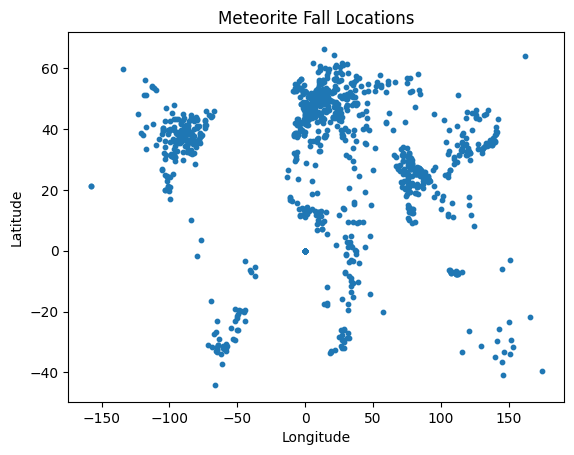

In [ ]:
# Scatter plot of meteorite coordinates
plt.scatter(met_data['reclong'], met_data['reclat'], s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Fall Locations')
plt.show()
print("")
